In [107]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib
import matplotlib.pyplot as plt

In [119]:
df = dd.read_csv('data/*.csv')
dfKent8thand9th = df[df['name'] == 'Kent Ave btw North 8th St and North 9th St']
#dfBrooklyn = df[df['name'] == 'Kent Ave btw South 6th St. and Broadway']
#dfBrooklyn = dd.concat([dfBrooklyn2, dfBrooklyn1])
dfKent8thand9th['date'] = dd.to_datetime(dfKent8thand9th['date'])
dfKent8thand9th['year-month'] = dfKent8thand9th['date'].dt.to_period('M')
dfKent8thand9th['date'] = dfKent8thand9th['date'].dt.date
dailyDataKent8thand9th = dfKent8thand9th.groupby(['date']).agg({'counts':'sum'}).compute()


dfKent6thandBroadway = df[df['name'] == 'Kent Ave btw South 6th St. and Broadway']
#dfBrooklyn = dd.concat([dfBrooklyn2, dfBrooklyn1])
dfKent6thandBroadway ['date'] = dd.to_datetime(dfKent6thandBroadway ['date'])
dfKent6thandBroadway ['year-month'] = dfKent6thandBroadway ['date'].dt.to_period('M')
dfKent6thandBroadway ['date'] = dfKent6thandBroadway ['date'].dt.date
dailyDataKent6thandBroadway  = dfKent6thandBroadway .groupby(['date']).agg({'counts':'sum'}).compute()

In [120]:
dailyDataKent8thand9th

,counts
date,
2016-11-22,561.0
2016-11-23,590.0
2016-11-24,593.0
2016-11-25,1031.0
2016-11-26,1300.0
...,...
2021-10-27,2947.0
2021-10-28,3419.0
2021-10-29,2516.0


In [121]:
dailyDataKent6thandBroadway

,counts
date,
2014-08-14,1792.0
2014-08-15,3192.0
2014-08-16,4441.0
2014-08-17,3874.0
2014-08-18,3305.0
...,...
2016-11-17,1175.0
2016-11-18,1230.0
2016-11-19,1242.0


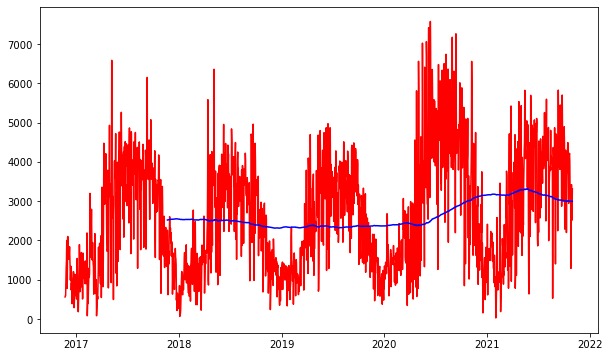

In [110]:
plt.figure(figsize = (10,6))
plt.plot(dailyDataKent8thand9th.index,dailyDataBrooklyn.counts, label = 'count', color = 'red')
plt.plot(dailyDataKent8thand9th.index,dailyDataBrooklyn.counts.rolling(window = 365).mean(), label = 'count', color = 'blue')

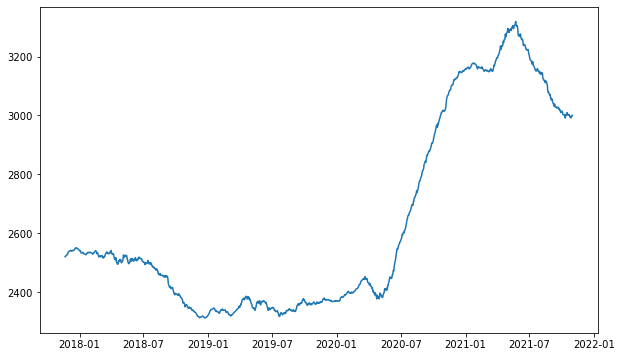

In [112]:
#Kent Ave btw North 8th St and North 9th St
plt.figure(figsize = (10,6))
plt.plot(dailyDataKent8thand9th.counts.rolling(window = 365).mean())


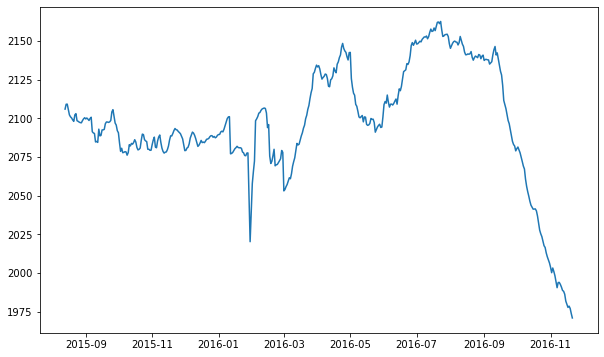

In [122]:
#'Kent Ave btw South 6th St. and Broadway'
plt.figure(figsize = (10,6))
plt.plot(dailyDataKent6thandBroadway.counts.rolling(window = 365).mean())